In [1]:
import pandas as pd

In [2]:
teams = pd.read_csv('teams.csv')
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [3]:
teams = teams[['team','country','year','athletes','age','medals','prev_medals']]

Finding Co Relation between predictors

In [4]:
 #finding the correlation of medals with other columns
teams[['year','athletes','age','prev_medals','medals']].corr()["medals"]

,medals
year,-0.021603
athletes,0.840817
age,0.025096
prev_medals,0.920048
medals,1.000000


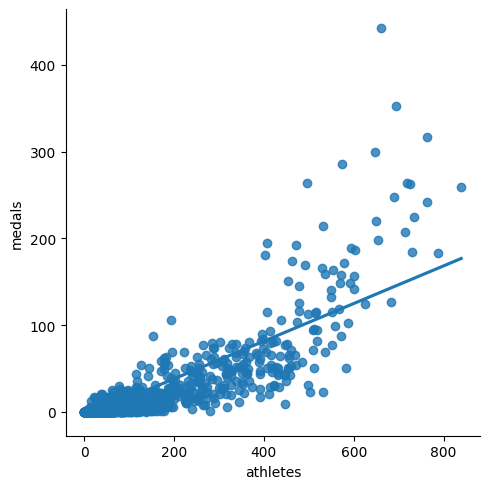

In [5]:
#seeing the relation between athlete and medals won to see if there is any relation between data here
import seaborn as sns
sns.lmplot(x = "athletes",y = "medals", fit_reg = True, ci = None, data = teams)

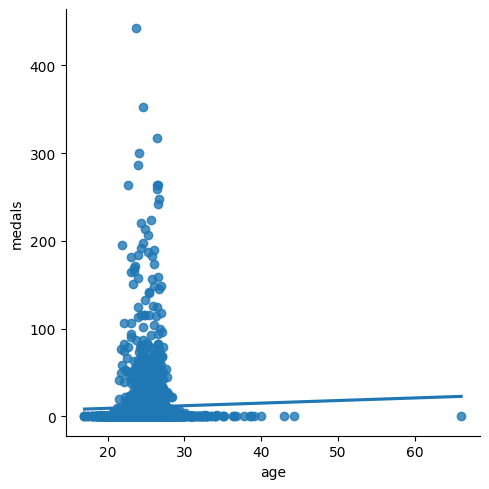

In [6]:
sns.lmplot(x = "age",y = "medals", fit_reg = True, ci = None, data = teams)

<Axes: ylabel='Frequency'>

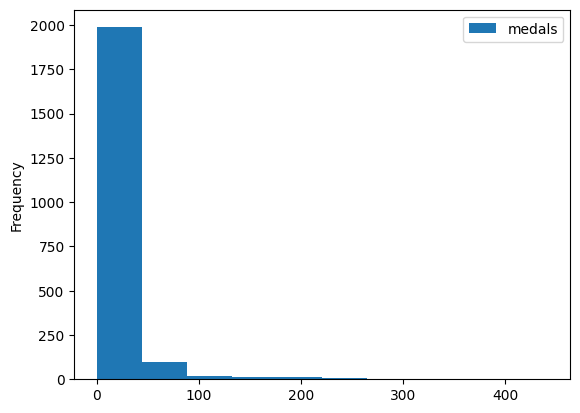

In [7]:
#plotting a histogram
teams.plot.hist(y = "medals")

##Data Cleaning

In [8]:
teams[teams.isnull().any(axis = 1)]

,team,country,year,athletes,age,medals,prev_medals
19,ALB,Albania,1992,9,25.3,0,NaN
26,ALG,Algeria,1964,7,26.0,0,NaN
39,AND,Andorra,1976,3,28.3,0,NaN
50,ANG,Angola,1980,17,17.4,0,NaN
59,ANT,Antigua and Barbuda,1976,17,23.2,0,NaN
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,0,NaN
2103,YAR,North Yemen,1984,3,27.7,0,NaN
2105,YEM,Yemen,1992,8,19.6,0,NaN
2112,YMD,South Yemen,1988,5,23.6,0,NaN


In [9]:
#drop any rows with missing values
teams = teams.dropna()
teams.shape

(2014, 7)

In [10]:
print(teams['year'].max(),teams['year'].min())

2016 1964


##Train Test Split

In [11]:
train = teams[teams['year'] < 2012].copy()
test = teams[teams['year'] >= 2012].copy()
#Data from 2016 to 2012 is testing as latest data and less than 2012 is train data. it is advisable to train previous data and test latest data

In [12]:
print(train.shape,test.shape)

(1609, 7) (405, 7)


##Training Our Model

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predictors = ['athletes','prev_medals']
target = 'medals'
reg.fit(train[predictors],train[target])

LinearRegression()

##Predictions and Rectifications

In [14]:
predictions = reg.predict(test[predictors])

In [15]:
#mean absolute arror
import numpy as np
error = np.mean((predictions - test[target]) ** 2)
error

66.98656891685023

In [16]:
test['predictions'] = predictions

In [17]:
#converting any negative value of predictions to zero
test.loc[test['predictions'] < 0,'predictions'] = 0

In [18]:
test['predictions'] = test['predictions'].round()

In [19]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test[target],test['predictions'])
mae

3.2987654320987656

In [20]:
teams.describe()['medals']

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


###Test Plotting

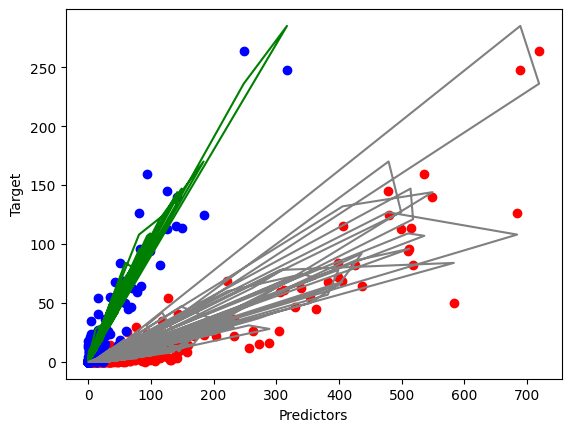

In [21]:
import matplotlib.pyplot as plt
plt.scatter(test['athletes'], test[target], color='red')
plt.scatter(test['prev_medals'], test[target], color='blue')
plt.plot(test['prev_medals'],test['predictions'],color = 'green')
plt.plot(test['athletes'],test['predictions'],color = 'grey')
plt.xlabel('Predictors')
plt.ylabel('Target')
plt.show()

##Checking Values

In [22]:
test[test['team'] == 'USA']

,team,country,year,athletes,age,medals,prev_medals,predictions
2053,USA,United States,2012,689,26.7,248,317.0,285.0
2054,USA,United States,2016,719,26.4,264,248.0,236.0


In [24]:
test[test['team'] == 'IND']

,team,country,year,athletes,age,medals,prev_medals,predictions
907,IND,India,2012,95,26.0,6,3.0,7.0
908,IND,India,2016,130,26.1,2,6.0,12.0


,0
6,1.0
7,0.0
24,0.0
25,0.0
37,1.0
...,...
2111,0.0
2131,0.0
2132,0.0
2142,2.0


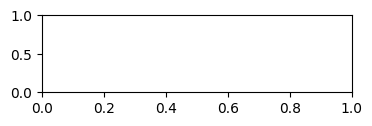

In [38]:
errors = (test['medals'] - test['predictions']).abs()
errors

In [39]:
#grouping the error by team and then averaging them
error_by_team = errors.groupby(test['team']).mean()
error_by_team

,0
team,
AFG,0.5
ALB,0.0
ALG,1.5
AND,0.0
ANG,0.0
...,...
VIE,1.0
VIN,0.0
YEM,0.0


In [40]:
medals = test['medals'].groupby(test['team']).mean()
medals

,medals
team,
AFG,0.5
ALB,0.0
ALG,1.5
AND,0.0
ANG,0.0
...,...
VIE,1.0
VIN,0.0
YEM,0.0


In [41]:
medals = test['medals'].groupby(test['team']).mean()
medals

,medals
team,
AFG,0.5
ALB,0.0
ALG,1.5
AND,0.0
ANG,0.0
...,...
VIE,1.0
VIN,0.0
YEM,0.0


In [46]:
error_ratio = error_by_team / medals
error_ratio

,0
team,
AFG,1.0
ALB,NaN
ALG,1.0
AND,NaN
ANG,NaN
...,...
VIE,1.0
VIN,NaN
YEM,NaN


In [47]:
error_ratio[~pd.isnull(error_ratio)]

,0
team,
AFG,1.000000
ALG,1.000000
ARG,0.853659
ARM,0.428571
AUS,0.367347
...,...
USA,0.126953
UZB,0.625000
VEN,1.750000


,0
team,
AFG,1.000000
ALG,1.000000
ARG,0.853659
ARM,0.428571
AUS,0.367347
...,...
UKR,0.951220
USA,0.126953
UZB,0.625000


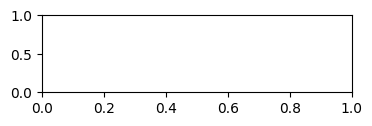

In [48]:
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

<Axes: ylabel='Frequency'>

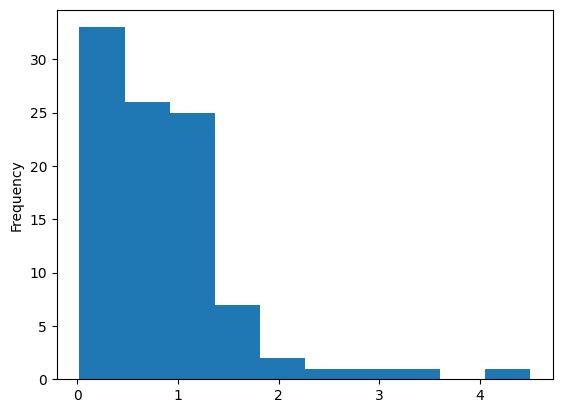

In [49]:
error_ratio.plot.hist()

Whether this model is good or not depends on what you want to find in this model via what predictors etc.
Good way to Improve model -
-> Add Predictors
-> Different Models (RF/Neural Network)
-> Measure error more predictively(Backtesting System)